# fftmorphology

In [1]:
import porespy as ps
from IPython.display import Markdown as show
show(ps.tools.show_docstring(ps.tools.fftmorphology))

---
 ## Documentation for ``fftmorphology``
 ---
**<span style="color:purple">fftmorphology</span>_(im, strel, mode='opening')_**


Perform morphological operations on binary images using fft approach for
improved performance


#### Parameters
* im : <b><i>nd-array</i></b>  The binary image on which to perform the morphological operation
* strel : <b><i>nd-array</i></b>  The structuring element to use.  Must have the same dims as ``im``.
* mode : <b><i>string</i></b>  The type of operation to perform.  Options are 'dilation', 'erosion',
	'opening' and 'closing'.

#### Returns
* image : <b><i>ND-array</i></b>  A copy of the image with the specified moropholgical operation applied
	using the fft-based methods available in scipy.fftconvolve.

#### Notes
This function uses ``scipy.signal.fftconvolve`` which *can* be more than
10x faster than the standard binary morphology operation in
``scipy.ndimage``.  This speed up may not always be realized, depending
on the scipy distribution used.

#### Examples
```python
import porespy as ps
from numpy import array_equal
import scipy.ndimage as spim
from skimage.morphology import disk
im = ps.generators.blobs(shape=[100, 100], porosity=0.8)
```

Check that erosion, dilation, opening, and closing are all the same as
the ``scipy.ndimage`` functions:

```python
result = ps.filters.fftmorphology(im, strel=disk(5), mode='erosion')
temp = spim.binary_erosion(im, structure=disk(5))
array_equal(result, temp)
```
```python
True
```

```python
result = ps.filters.fftmorphology(im, strel=disk(5), mode='dilation')
temp = spim.binary_dilation(im, structure=disk(5))
array_equal(result, temp)
```
```python
True
```

```python
result = ps.filters.fftmorphology(im, strel=disk(5), mode='opening')
temp = spim.binary_opening(im, structure=disk(5))
array_equal(result, temp)
```
```python
True
```

```python
result = ps.filters.fftmorphology(im, strel=disk(5), mode='closing')
temp = spim.binary_closing(im, structure=disk(5))
array_equal(result, temp)
```
```python
True
```
---

## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

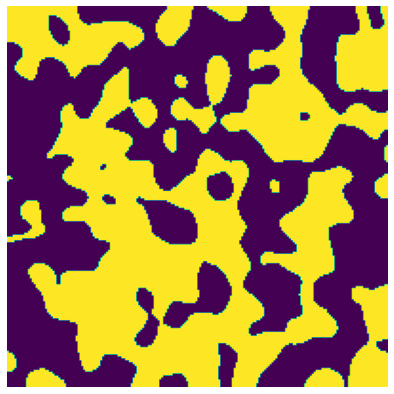

In [3]:
im = ps.generators.blobs([200, 200])
plt.figure(figsize=[7, 7])
plt.axis(False)
plt.imshow(im)

strel = ps.tools.ps_disk(3)
mode='erosion'

## Apply tool:

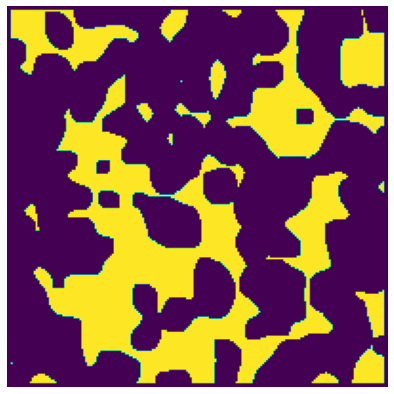

In [4]:
im = ps.tools.fftmorphology(im = im, strel = strel, mode = mode)
plt.figure(figsize=[7, 7])
plt.axis(False)
plt.imshow(im)